<div style="background-color:rgba(255, 0, 0, 0.57); border : 3px solid black; border-radius : 19px;margin : 1% ; padding : 3%;text-align : center;font-size : 3em;font-weight : bold;">
    Marche de Jarvis
</div>
<div style="text-align : center;">Devoir fait par Omar ENADY et Jorys UGOLIN du groupe Pégasus </div>
<p>
Dans le cadre de la <strong>SAE202 : Exploration algorithmique d'un problème</strong> Il nous a été demandé de réaliser un projet mathématiques et informatique. Après concertation en groupe nous avons choisis de réaliser le projet <em>Marche de jarvis</em>.
</p>
<p>Voici la description qui nous a été donnée :</p>
<ul>
<li><strong>Niveau de difficulté</strong> : ☆</li>
<li><strong>Description</strong> : En géométrie algorithmique la marche de Jarvis est un algorithme permettant de calculer
l'enveloppe convexe d'un nuage de point.</li>
<li><strong>Animation</strong> : Les diférentes étapes de l'algorithme</li>    
</ul>
<p>DIFFICULTÉ --> trouver un algo qui marche qu'avec les coordonnées.</p>
<div><br>Les différentes étapes :</div>
<ol><li> Les points du graphe en x et y, il faut les représenter dans un graphe.</li>
<li> Après présentations des points nous partons du point le plus à gauche (abcisse le plus inférieur, x).</li>
<li> Comparer les points pour trouver celui qui tourne le plus à gauche en partant du premier point pour trouver le point à "éliminer"</li>
<li>Puis comparer tout les points grâce à une boucle.</li></ol>

<div style="background-color:rgba(0, 0, 255, 0.57); border : 3px solid black; border-radius : 19px;margin : 0% 10% ; padding : 1%;text-align : center;font-size : 2em;">
    Bibliothèques
</div>
<p>Voici les bibliothèques dont nous aurons besoin pour l'exécution des programmes proposés.</p>

In [17]:
from IPython.display import HTML
from matplotlib.pyplot import *
from matplotlib import *
from random import *
import math

<div style="background-color:rgba(0, 0, 255, 0.57); border : 3px solid black; border-radius : 19px;margin : 0% 10% ; padding : 1%;text-align : center;font-size : 2em;">
    Etape 1 : Représentation dans un graphe.
</div>

<p>J'ai créer une fonction random qui créer une liste d'entier au hasard.
</p>

In [18]:
def random(x):
    """
    x : nombre d'entier dans la liste
    retourne une liste d'entier
    """
    tab = []
    i = 0
    while i < x:
        tab.append(randint(-10,10))
        i += 1
    return tab

<p>Puis nous utiliserons la fonction plot qui représentera graphiquement les points en utilisant en paramètre une liste d'abcisse et d'ordonnée.</p>
<p>Etape 1 : Les points du graphe en x et y, il faut les représenter dans un graphe.</p>

(-11.0, 11.0)

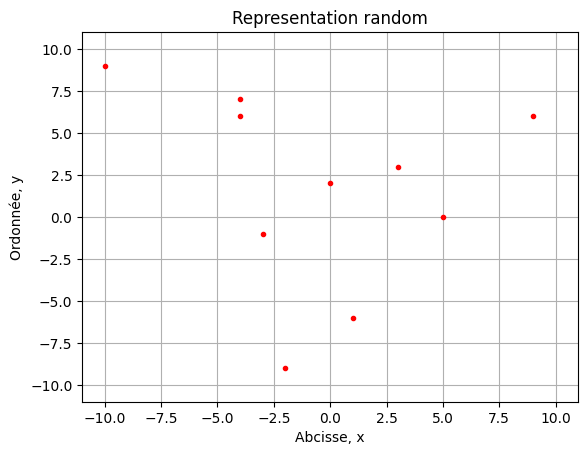

In [19]:
#On utilise la fonction plot qui prend en parametre 2 listes de points en abcisses et en ordonnées, il faut que ces 2 listes 
#soit de même longueur car un point ne peut être un point sans avoir un abcisse et un ordonnée.

#Un point sera une liste de 2 cases tels que p = (2, 3) --> abcisse : 2, ordonnée : 3

#La fonction plot utilise 2 liste donc nous devons faire en sorte que plusieurs point (x,y) devienne une liste d'abcisse 
#et d'ordonnées.

#Création plusieurs points aléatoires.
tabX = random(10)
tabY = random(10)
grid(True)
plot(tabX, tabY, 'r.')
title("Representation random")
xlabel("Abcisse, x")#On donne un nom à l'axe des abcisses
ylabel("Ordonnée, y")#On donne un nom à l'axe des ordonnées
xlim(-11,11) #On précise le champ des abcisses
ylim(-11,11)

<div style="background-color:rgba(0, 0, 255, 0.57); border : 3px solid black; border-radius : 19px;margin : 0% 10% ; padding : 1%;text-align : center;font-size : 2em;">
    Etape 2 : Point le plus à gauche.
</div>
<p>Après présentations des points nous partons du point le plus à gauche (abcisse le plus inférieur, x).
</p>
<p>Nous allons créer une fonction abcisse et ordonnées qui retourne l'abcisse et l'ordonnée d'un point puis la fonction aGauche qui retourne le point avec l'abcisse le plus bas donc le plus à Gauche.</p>

In [20]:
def abcisse(x) : 
    return x[0]

def ordonnee(x) : 
    return x[1]


def aGauche(x):
    """
    x : liste de point
    return le point le plus a gauche : x le plus inférieur
    """
    i = 0
    test = abcisse(x[0])
    res = []
    mark = True # Marquage qui nous permet de retourner le 1er point de la liste si il est le plus petit
    while i < len(x) - 1:
        if test > abcisse(x[i+1]):
            test = abcisse(x[i+1])
            res = x[i+1]
            mark = False
        i += 1
    if mark == True:
        return x[0]
    else:
        return res

x = random(10)
y = random(10)
z = liste(x,y)
print("La liste de point est : "+str(z))
print("Et le point le plus à gauche est :"+str(aGauche(z)))

#On essaie avec le programme aléatoire au dessus

La liste de point est : [[-3, -7], [-1, 2], [0, 6], [0, -6], [4, -8], [3, 4], [-10, 3], [10, -9], [-8, -1], [6, -3]]
Et le point le plus à gauche est :[-10, 3]


<div style="background-color:rgba(0, 0, 255, 0.57); border : 3px solid black; border-radius : 19px;margin : 0% 10% ; padding : 1%;text-align : center;font-size : 2em;">Etape 3 : Comparaison des points. </div>
<p>Comparer les points pour trouver celui qui tourne le plus à gauche en partant du premier point pour trouver le point à "éliminer".</p>
<p>Nous allons utiliser une formule qui permet de trouver quelle point éliminer, cette formule a besoin des coordonnées de 3 points : les coordonnées du point dans l'enveloppe convexe (Q), le point possiblement dans l'enveloppe convexe (P) et le point qui est comparé au point possiblement dans l'enveloppe convexe pour voir si il est meilleur candidat (P).</p>
<p>La formule pour la comparaison est : ($Q_x$ - $P_x$) x ($R_y$ - $P_y$) - ($Q_y$ - $P_y$) x ($R_x$ - $P_x$), $Q_x$ pour l'abscisse de $Q$ et $Q_y$ pour l'ordonnée de $Q$.</p>
<p>Cette formule nous permet de savoir quelle point éliminer en regardant le sens du triangle QPR, si le triangle est de sens horaire alors nous gardons le point candidat Q et nous changeons le point R et si le triangle n'est pas de sens horaire alors le point R devient le point Q et nous changeons de point R si il y en a encore à tester. Si la formule donne un résultat négatif alors le point R change et nous gardons Q, si la formule donne un résultat positif alors le point R devient le point Q et nous changeons encore une fois le point R (Voir fonction jarvis) et si la formule donne 0 alors les points sont colinéaires. </p>

In [21]:

def comparaison(P,Q,R):
    """
    Définition une fonction comparaison qui prend en paramètre 3 point (le points déja dans l'enveloppe convexe P, le candidat Q,
et celui qu'on compare R)
    """
    Px = abcisse(P)
    Qx = abcisse(Q)
    Rx = abcisse(R)
    Py = ordonnee(P)
    Qy = ordonnee(Q)
    Ry = ordonnee(R)
    return (Qx - Px)*(Ry - Py) - (Qy - Py)*(Rx - Px)

a = [randint(-10,10),randint(-10,10)]
print("Le point a vaut : "+str(a))
b = [randint(-10,10),randint(-10,10)]
print("Le point b vaut : "+str(b))
c = [randint(-10,10),randint(-10,10)]
print("Le point c vaut : "+str(c))
print("La comparaison de ces 3 point est : "+str(comparaison(a,b,c)))

Le point a vaut : [4, 7]
Le point b vaut : [7, 3]
Le point c vaut : [-3, -7]
La comparaison de ces 3 point est : -70


<p>Quelques simple fonction qui seront utiles plus tard.</p>

In [22]:


#Fonction qui transforme 2 listes d'abcisses et d'ordonnées en liste de points (x, y)
def liste(x, y):
    """
    return une liste de point 
    parametre : x= liste d'abcisse, y= liste d'ordonnée
    """
    if len(x) != len(y):
        return None 
    liste = []
    point = []
    i = 0
    while i < len(x):
        point.append(x[i])
        point.append(y[i])
        liste.append(point)
        i += 1
        point = []
    return liste

#Fonction qui transforme une liste de point en une liste contenant une liste d'abscisse et une d'ordonnée.
def point(x):
    """
    return 1 liste avec 2 liste à l'intérieur une d'abcisse et une d'ordonnée
    parametre : x= liste de points
    """
    if len(x) == 0:
        return None #Si la liste est vide on return none
    i = 0
    abc = []
    ordon = []
    res = []
    while i < len(x):
        X = x[i][0]
        abc.append(X)
        X = x[i][1]
        ordon.append(X)
        i += 1
    res.append(abc)
    res.append(ordon)
    return res


In [23]:
#Supprime dans une liste de points un point en paramètre (Fonction inutile mais je la laisse quand même)
def supprime(point, listePoint):
    """
    Supprime dans une liste de points un point en parametre
    point : le point qu'on veut supprimer
    listePoint : la liste dans laquelle on veut supprimer le points
    """
    i = 0
    while i < len(listePoint):
        if listePoint[i] == point:
            listePoint.pop(i)
            return listePoint
        i += 1
    return listePoint

In [24]:
#Fonction aussi inutile...
def copie(tab, tab1):
    """
    Copie le point tab1 dans tab sans que tab soit une reference de tab1
    """
    tab.append(abcisse(tab1))
    tab.append(ordonnee(tab1))
    return tab

In [25]:
def pluspetit(x):
    i = 0
    res = x[i]
    while i < len(x) - 1:
        if res > x[i+1]:
            res = x[i + 1]
        i += 1
    if res == x[len(x) - 1]: 
        return True
    return False

x = rand(10)
print("x = "+str(x))
print("Le dernier est le plus petit ? : "+str(pluspetit(x)))

x = [-7, 7, 4, -3, 4, -1, -8, -7, 10, -4]
Le dernier est le plus petit ? : False


In [26]:
def doublon(x):
    """
    Fonction qui enlève les doublons d'une liste de points 
    x : liste de point
    """
    i = 0
    while i < len(x) - 1:
        indice = i
        while indice < len(x) - 1:
            if x[i] == x[indice + 1]:
                x.pop(indice + 1)
            indice += 1
        i += 1
    return x


In [27]:
def rand(x):
    """
    Fait un tableau avec des randint dedans.
    x : longueur du tableau random souhaité
    """
    i = 0
    tab = []
    while i < x:
        tab.append(randint(-10,10))
        i += 1
    return tab

<div style="background-color:rgba(0, 0, 255, 0.57); border : 3px solid black; border-radius : 19px;margin : 0% 10% ; padding : 1%;text-align : center;font-size : 2em;">Etape 4 : Fonction qui fait tout automatiquement.</div>
<p>La complexité pour le pire des cas est $n^2$ pour $n$ nombre de points.</p>

La liste d'abscisse est :[2, 9, -5, -7, -7, 9, 1, 9, -3, -5, 7, -2, -7, -10, 3, 6, -1, -10, 7, -2, -7, -7, 10, 3, -1, -6, 0, 9, -7, 5, 2, -7, 4, -3, 1, -5, 1, 10, 1, 1, -4, -3, 5, 7, 4, 4, -8, 5, 6, -8, 6, -4, 7, 1, 6, -10, 1, -4, -4, -10, -3, -10, -8, -1, -5, -8, -8, -9, -6, 7, 0, -1, -1, -5, -10, -10, -9, -1, 4, -2, 7, -5, 6, 9, 2, -2, -7, 7, -3, -5, -2, -3, -8, 5, 1, -2, 4, 8, -10, 9]
La liste d'ordonnée est :[-5, -3, 1, 4, -4, -9, 2, 2, -8, -4, -5, 3, -5, -3, 5, 9, -1, 1, 10, -7, 0, -3, -7, 6, 6, 0, -2, -2, -9, -2, -1, -2, -8, 3, 5, 6, 10, -7, 0, 5, 5, -8, 3, -7, 5, -9, 9, 1, 9, 3, 0, 2, 5, -10, -9, -3, -2, 1, -9, 8, 1, -1, 10, -9, 10, -6, -7, 4, -6, -4, 9, 6, -3, 0, 4, 3, 1, -3, 7, 6, -3, 0, 5, 6, 5, 9, 5, 1, 0, 10, 8, -4, 1, 2, 0, -4, 3, -8, 0, -10]
[[2, -5], [9, -3], [-5, 1], [-7, 4], [-7, -4], [9, -9], [1, 2], [9, 2], [-3, -8], [-5, -4], [7, -5], [-2, 3], [-7, -5], [-10, -3], [3, 5], [6, 9], [-1, -1], [-10, 1], [7, 10], [-2, -7], [-7, 0], [-7, -3], [10, -7], [3, 6], [-1, 6], [-

(-11.0, 11.0)

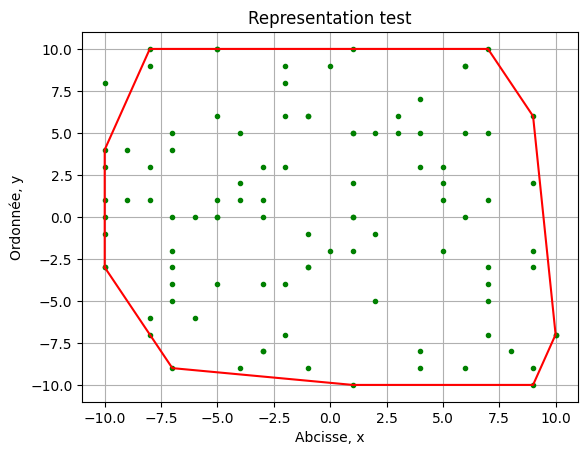

In [29]:


def jarvis(Q,R):
    """
    Q= liste d'abcisses
    R= liste d'ordonnées
    return les coordonnées des points de l'enveloppe convexe
    """
    nuageDePoint = liste(Q,R) #On utilise la fonction liste pour faire une liste de point en utilisant une liste d'abcisse et d'ordonnée
    #Trouvons le point le plus a gauche car il fait forcément partie de l'enveloppe convexe
    print(nuageDePoint)
    nuageDePoint = doublon(nuageDePoint) # Supprime les doublons si il y en a 
    print(nuageDePoint)
    p1 = []
    p2 = aGauche(nuageDePoint)
    p1 = p2.copy() # valeur du point le plus a gauche et pas simplement une référence du point dans la liste
    enveloppe = []
    enveloppe.append(p1) # On ajoute le point le plus a gauche car il est dans l'enveloppe convexe
    i = 0
    while i < len(nuageDePoint):
        nuageDePointCopie = []
        nuageDePointCopie = nuageDePoint.copy()
        while i < len(nuageDePointCopie) - 1:
            if comparaison(p1,nuageDePointCopie[0],nuageDePointCopie[1]) < 0:
                nuageDePointCopie.pop(1)
            else:
                nuageDePointCopie.pop(0)
        if nuageDePointCopie[0] == p2:
            return enveloppe
        else:
            enveloppe.append(nuageDePointCopie[0])
        p1 = enveloppe[len(enveloppe) - 1]
        indice = 0
        while nuageDePointCopie[0] != nuageDePoint[indice]:
            indice += 1
        nuageDePoint.pop(indice) #On supprime le point ajouter à l'enveloppe convexe car il n'a pas plus besoin d'être testé

#J'ai fais un petit programme pour illustrer l'enveloppes convexe        

absx = rand(100)
ordo = rand(100)
print("La liste d'abscisse est :"+str(absx))
print("La liste d'ordonnée est :"+str(ordo))
marche = jarvis(absx, ordo)
print("L'enveloppe convexe des ses points est : "+str(marche))
marche.append(marche[0])
lespoints = point(marche)
grid(True)
plot(absx, ordo, 'g.')
plot(lespoints[0], lespoints[1], 'r')
title("Representation test")
xlabel("Abcisse, x")#On donne un nom à l'axe des abcisses
ylabel("Ordonnée, y")#On donne un nom à l'axe des ordonnées
xlim(-11,11) #On précise le champ des abcisses
ylim(-11,11)